In [1]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df= pd.read_csv('train.csv')
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [3]:
x=df.drop(["Loan_Status"],axis=1)
y=df.Loan_Status

In [4]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x,y)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier( n_estimators=500)
rf.fit(x,y)   

RandomForestClassifier(n_estimators=500)

In [5]:
dt.score(x,y)

1.0

In [6]:
dt.predict([[0,1,2,0,0,4583,1500,180,360,1,0]])

array([0], dtype=int64)

In [7]:
rf.predict([[0,1,2,1,0,3333,22,2323,360,1,2]])

array([1], dtype=int64)

In [8]:
rf_predict = rf.predict(x)

Text(42.0, 0.5, 'True_Values')

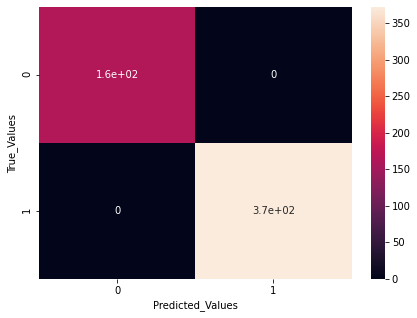

In [9]:
cm = confusion_matrix(y,rf_predict)
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted_Values')
plt.ylabel('True_Values')

In [10]:
print(classification_report(y, rf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       372

    accuracy                           1.00       535
   macro avg       1.00      1.00      1.00       535
weighted avg       1.00      1.00      1.00       535



In [11]:
import joblib

In [12]:
joblib.dump(dt,'dt_joblib')
joblib.dump(rf,'rf_joblib')

['rf_joblib']

In [13]:
dt_j = joblib.load('dt_joblib')
rf_j = joblib.load('rf_joblib')

In [14]:
type(int(dt_j.predict([[0,1,2,1,0,3333,22,2323,360,1,2]])[0]))

int

In [15]:
rf_j.predict([[0,1,2,1,0,3333,22,2323,360,1,2]])

array([1], dtype=int64)